## Models evaluation

The 9 different combinations of steps to apply to the data in order to improve model performance should be evaluated
from various points of view as both accuracy and recall are critical in this application.

Each model is then evaluated against the holdout set made of 1378 samples (20% of the total), equally split in safe and
weak files.

In [1]:
import os

from joblib import load

from sklearn.metrics import classification_report

from src.processing.dataset_splitter import __test_data as test_data
from src.processing.dataset_splitter import __test_labels as test_labels

MODELS_DIR = "../../models/"

for file in os.listdir(MODELS_DIR):
    print(file)
    
    classifier = load(f"{MODELS_DIR}/{file}")
    
    predictions = classifier.predict(test_data)
    
    report = classification_report(test_labels, predictions, target_names=["Safe files", "Weak files"])
    print(report)
    print()
    

minmax-no_selector-classifier.joblib
              precision    recall  f1-score   support

  Safe files       0.67      0.80      0.73       689
  Weak files       0.75      0.60      0.67       689

    accuracy                           0.70      1378
   macro avg       0.71      0.70      0.70      1378
weighted avg       0.71      0.70      0.70      1378


minmax-pca-classifier.joblib
              precision    recall  f1-score   support

  Safe files       0.64      0.83      0.73       689
  Weak files       0.76      0.54      0.63       689

    accuracy                           0.69      1378
   macro avg       0.70      0.69      0.68      1378
weighted avg       0.70      0.69      0.68      1378


minmax-rf-classifier.joblib
              precision    recall  f1-score   support

  Safe files       0.64      0.82      0.72       689
  Weak files       0.75      0.55      0.63       689

    accuracy                           0.68      1378
   macro avg       0.70      0.6

Results show how the only improvement over the simple model built for the proof of concept comes from the model where no
scalers nor slectors were involved and grid was performed only over Logistic Regression hyperparameters.

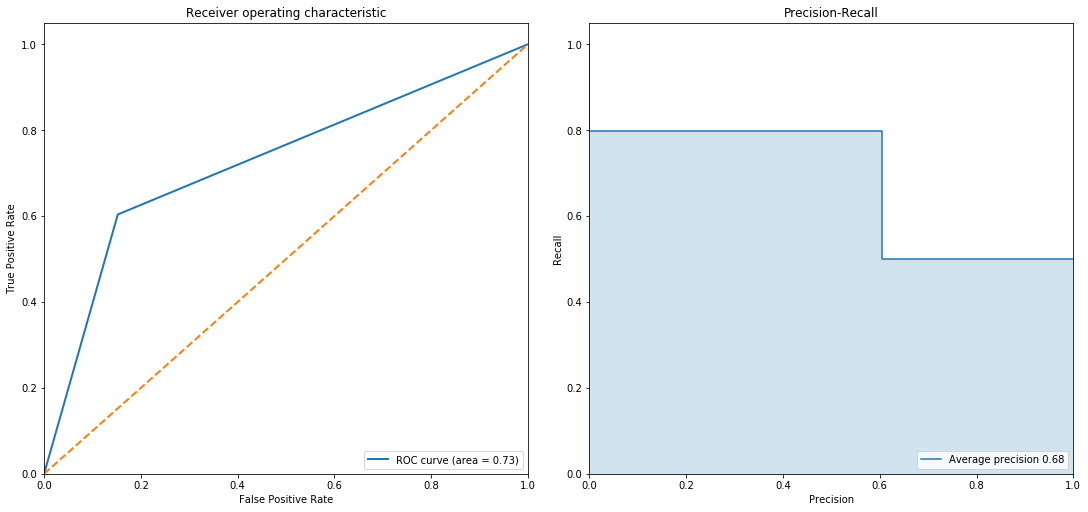

In [2]:
%matplotlib inline

from inspect import signature
from joblib import load

import matplotlib.pyplot as plt

from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

from src.processing.dataset_splitter import __test_data as test_data
from src.processing.dataset_splitter import __test_labels as test_labels

classifier = load("../../models/no_scaler-no_selector-classifier.joblib")
predictions = classifier.predict(test_data)

fpr, tpr, roc_thresholds = roc_curve(test_labels, predictions)
roc_auc = auc(fpr, tpr)

precision, recall, pr_thresholds = precision_recall_curve(test_labels, predictions)
average_precision = average_precision_score(test_labels, predictions)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7), constrained_layout=True)

lw = 2

ax[0].plot(fpr, tpr, lw=lw, label='ROC curve (area = {0:0.2f})'.format(roc_auc))
ax[0].plot([0, 1], [0, 1], lw=lw, linestyle='--')
ax[0].set_xlim([0.0, 1.0])
ax[0].set_ylim([0.0, 1.05])
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Receiver operating characteristic')
ax[0].legend(loc="lower right")

ax[1].step(recall, precision, where='post')
step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
ax[1].fill_between(recall, precision, alpha=0.2, **step_kwargs)
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('Precision')
ax[1].set_ylabel('Recall')
ax[1].set_title('Precision-Recall')
ax[1].legend(["Average precision {0:0.2f}".format(average_precision)], loc="lower right")

plt.show()

ROC-AUC and P-R curve show that the model performs well but far from the ideal, as desired values in this case should be
above or at least around 90%.

Nonetheless the model should be considered a good starting point to dig deeper with even larger hyperparameter grids and
maybe a bigger and better dataset.
